In [ ]:
!pip install matplotlib numpy pandas seaborn scikit-learn nltk

In [1]:
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sn
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('datasets/7-sentiment-analysis.csv')

nltk.download('stopwords')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [3]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [4]:
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
cm_RandFor = confusion_matrix(y_test, y_pred_rf)

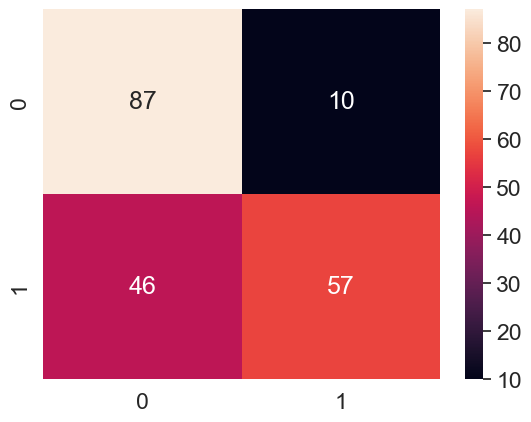

In [5]:
df_cm = pd.DataFrame(cm_RandFor, range(2), range(2))
sn.set(font_scale=1.5)
sn.heatmap(df_cm, annot=True)
plt.show()

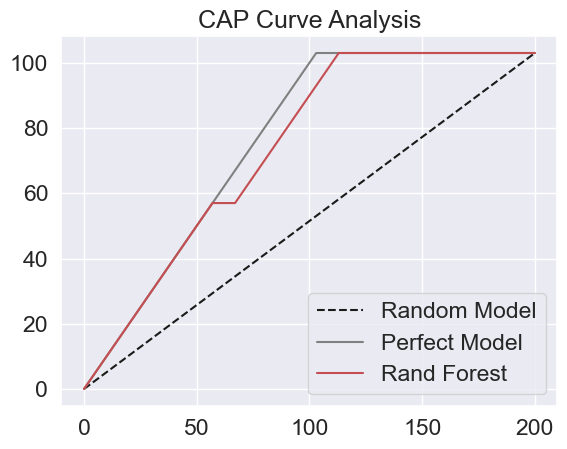

In [6]:
total = len(y_test)
one_count = np.sum(y_test)
zero_count = total - one_count
lm_RandFor = [y for _, y in sorted(zip(y_pred_rf, y_test), reverse=True)]
x = np.arange(0, total + 1)
y_RandFor = np.append([0], np.cumsum(lm_RandFor))
plt.title('CAP Curve Analysis')
plt.plot([0, total], [0, one_count], c='k', linestyle='--', label='Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c='grey', label='Perfect Model')
plt.plot(x, y_RandFor, c='r', label='Rand Forest')
plt.legend()
plt.show()